# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [44]:
!pip install citipy

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'544b1c3beaa3b05e47eee5b025d7893d'

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = [-90, 90]
lng_range = [-180, 180]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [24]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={weather_api_key}


url = f"https://api.openweathermap.org/data/2.5/weather?"
#lat={lat}&lon={lon}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
 # Add 1 to the record count
    record_count += 1     
    
 # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather ["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olafsvik
Processing Record 2 of Set 1 | ambilobe
Processing Record 3 of Set 1 | fevralsk
City not found. Skipping...
Processing Record 4 of Set 1 | miri
Processing Record 5 of Set 1 | reconquista
Processing Record 6 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 7 of Set 1 | bayji
Processing Record 8 of Set 1 | kedrovyy
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | portland
Processing Record 11 of Set 1 | mocambique
City not found. Skipping...
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | zemaiciu naumiestis
Processing Record 18 of Set 1 | vyshkovo
Processing Record 19 of Set 1 | torbay
Processing Record 20 of Set 1 | portree
Processing

Processing Record 36 of Set 4 | hamilton
Processing Record 37 of Set 4 | tuatapere
Processing Record 38 of Set 4 | natyrbovo
Processing Record 39 of Set 4 | bethel
Processing Record 40 of Set 4 | iskateley
Processing Record 41 of Set 4 | arraial do cabo
Processing Record 42 of Set 4 | batticaloa
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | yumen
Processing Record 45 of Set 4 | tibu
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | antalaha
Processing Record 48 of Set 4 | okha
Processing Record 49 of Set 4 | saskylakh
Processing Record 0 of Set 5 | sawakin
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | sabla
Processing Record 3 of Set 5 | guatire
Processing Record 4 of Set 5 | marcona
City not found. Skipping...
Processing Record 5 of Set 5 | ishigaki
Processing Record 6 of Set 5 | tashtyp
Processing Record 7 of Set 5 | tura
Processing Record 8 of Set 5 | esperance
Processing Record 9 

Processing Record 25 of Set 8 | kita
Processing Record 26 of Set 8 | port-cartier
Processing Record 27 of Set 8 | xinyu
Processing Record 28 of Set 8 | marquette
Processing Record 29 of Set 8 | bolonchen
City not found. Skipping...
Processing Record 30 of Set 8 | brenham
Processing Record 31 of Set 8 | nabire
Processing Record 32 of Set 8 | khatanga
Processing Record 33 of Set 8 | ambon
Processing Record 34 of Set 8 | kulhudhuffushi
Processing Record 35 of Set 8 | madang
Processing Record 36 of Set 8 | moussoro
Processing Record 37 of Set 8 | sarangani
Processing Record 38 of Set 8 | bulawayo
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | singapore
Processing Record 41 of Set 8 | whitehaven
Processing Record 42 of Set 8 | strezhevoy
Processing Record 43 of Set 8 | ayan
Processing Record 44 of Set 8 | arrecife
Processing Record 45 of Set 8 | westport
Processing Record 46 of Set 8 | inuvik
Processing Record 47 of Set 8 | kruisfontein
Processing Record 48 of Set 8

Processing Record 14 of Set 12 | springdale
Processing Record 15 of Set 12 | mackay
Processing Record 16 of Set 12 | shelabolikha
Processing Record 17 of Set 12 | kulevcha
Processing Record 18 of Set 12 | karaul
City not found. Skipping...
Processing Record 19 of Set 12 | canutama
Processing Record 20 of Set 12 | nata
Processing Record 21 of Set 12 | poum
Processing Record 22 of Set 12 | goundam
Processing Record 23 of Set 12 | chipinge
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | lydenburg
Processing Record 26 of Set 12 | windhoek
Processing Record 27 of Set 12 | avera
Processing Record 28 of Set 12 | chimbarongo
Processing Record 29 of Set 12 | urusha
Processing Record 30 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 31 of Set 12 | pahrump
Processing Record 32 of Set 12 | kyabe
Processing Record 33 of Set 12 | xiuyan
Processing Record 34 of Set 12 | lieto
Processing Record 35 of Set 12 | puerto vallarta
Processing Record 36 of Se

[{'City': 'olafsvik',
  'Lat': 64.8945,
  'Lng': -23.7142,
  'Max Temp': 1.03,
  'Humidity': 53,
  'Cloudiness': 42,
  'Wind Speed': 9.01,
  'Country': 'IS',
  'Date': 1674443851},
 {'City': 'ambilobe',
  'Lat': -13.2,
  'Lng': 49.05,
  'Max Temp': 22.49,
  'Humidity': 93,
  'Cloudiness': 100,
  'Wind Speed': 0.66,
  'Country': 'MG',
  'Date': 1674443852},
 {'City': 'miri',
  'Lat': 4.4148,
  'Lng': 114.0089,
  'Max Temp': 30.08,
  'Humidity': 74,
  'Cloudiness': 40,
  'Wind Speed': 1.54,
  'Country': 'MY',
  'Date': 1674443854},
 {'City': 'reconquista',
  'Lat': -29.15,
  'Lng': -59.65,
  'Max Temp': 26.61,
  'Humidity': 38,
  'Cloudiness': 0,
  'Wind Speed': 2.49,
  'Country': 'AR',
  'Date': 1674443854},
 {'City': 'bayji',
  'Lat': 34.9311,
  'Lng': 43.487,
  'Max Temp': 9.5,
  'Humidity': 49,
  'Cloudiness': 0,
  'Wind Speed': 2.55,
  'Country': 'IQ',
  'Date': 1674443855},
 {'City': 'kedrovyy',
  'Lat': 56.1667,
  'Lng': 91.8167,
  'Max Temp': -16.77,
  'Humidity': 80,
  'Cloudine

In [25]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [26]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olafsvik,64.8945,-23.7142,1.03,53,42,9.01,IS,1674443851
1,ambilobe,-13.2000,49.0500,22.49,93,100,0.66,MG,1674443852
2,miri,4.4148,114.0089,30.08,74,40,1.54,MY,1674443854
3,reconquista,-29.1500,-59.6500,26.61,38,0,2.49,AR,1674443854
4,bayji,34.9311,43.4870,9.50,49,0,2.55,IQ,1674443855


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("./output/cities.csv", index_label="City_ID")

In [28]:
# Read saved data
city_data_df = pd.read_csv("output/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olafsvik,64.8945,-23.7142,1.03,53,42,9.01,IS,1674443851
1,ambilobe,-13.2000,49.0500,22.49,93,100,0.66,MG,1674443852
2,miri,4.4148,114.0089,30.08,74,40,1.54,MY,1674443854
3,reconquista,-29.1500,-59.6500,26.61,38,0,2.49,AR,1674443854
4,bayji,34.9311,43.4870,9.50,49,0,2.55,IQ,1674443855


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

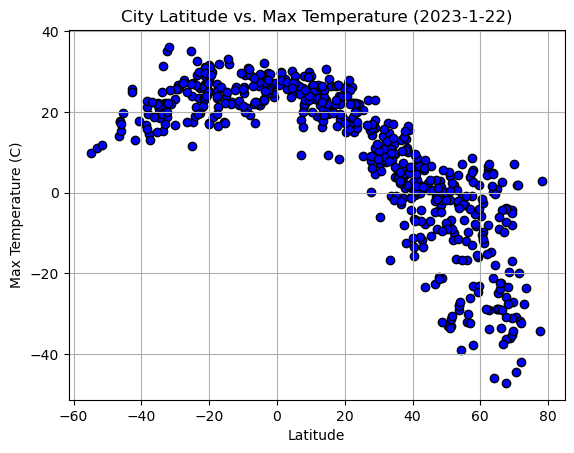

In [35]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Max Temp"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-1-22)")
plt.grid()


# Save the figure
plt.savefig("output/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

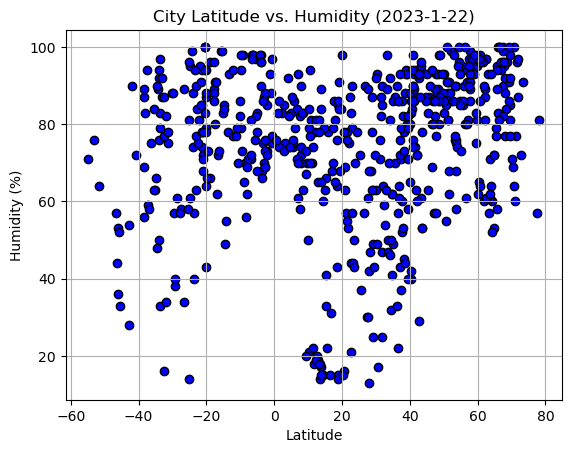

In [41]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Humidity"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-1-22)")
plt.grid()


# Save the figure
plt.savefig("output/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

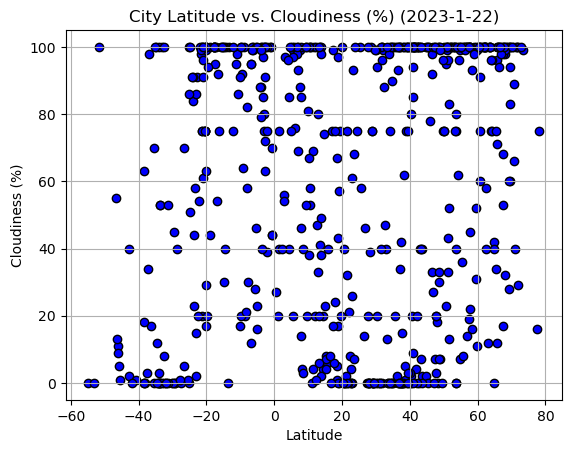

In [42]:
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Cloudiness"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

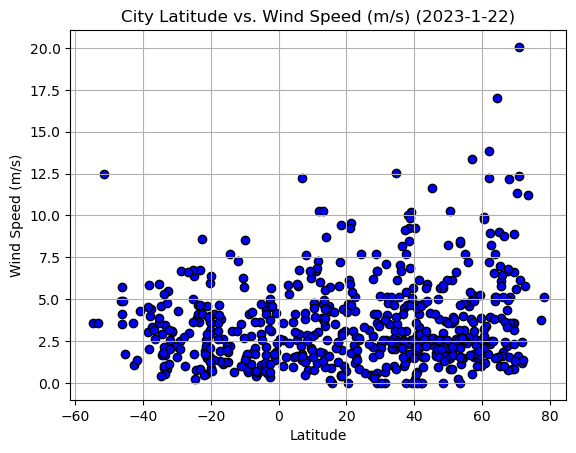

In [44]:
# YOUR CODE HERE
plt.scatter(x=city_data_df["Lat"], y= city_data_df["Wind Speed"], facecolor="b", edgecolors="black")
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (m/s) (2023-1-22)")
plt.grid()

# Save the figure
plt.savefig("output/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


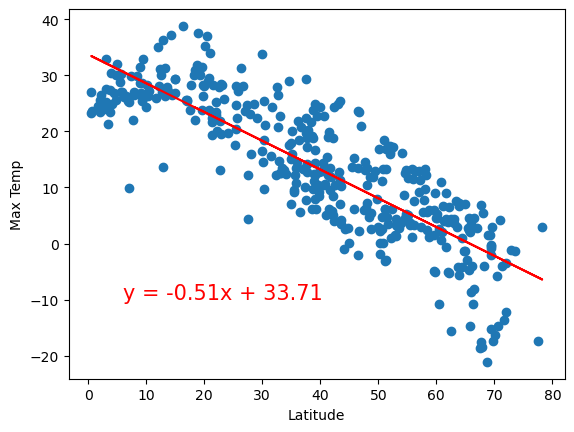

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


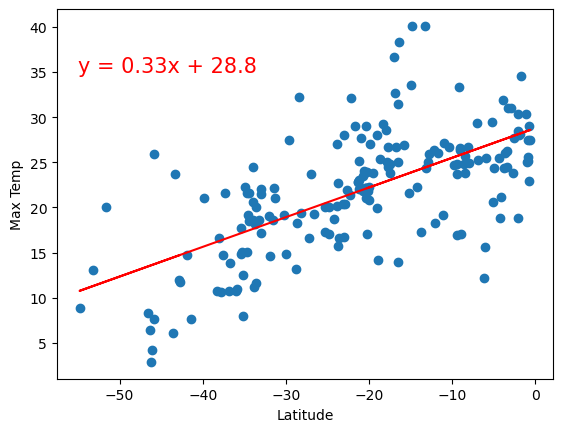

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


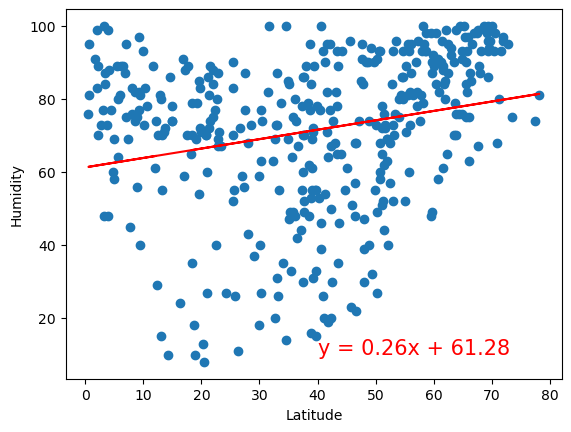

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


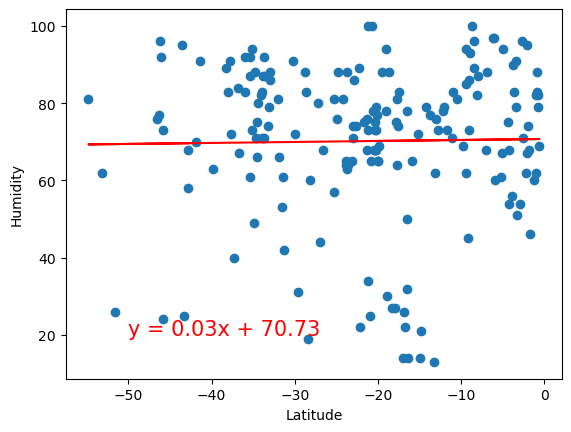

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


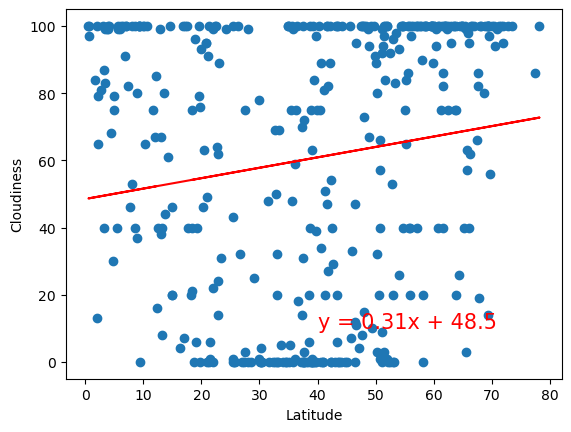

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


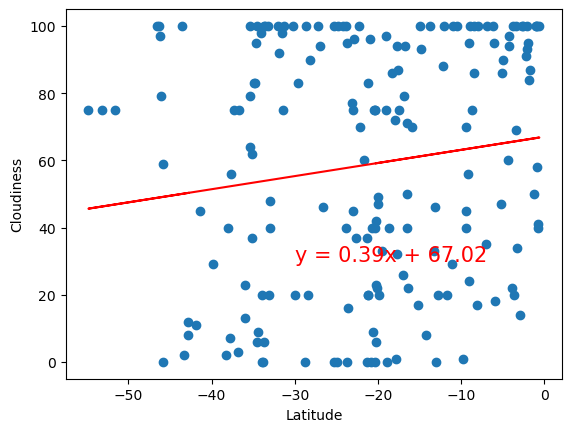

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


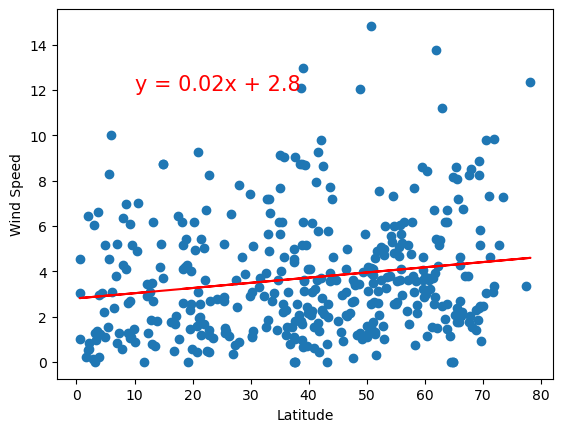

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


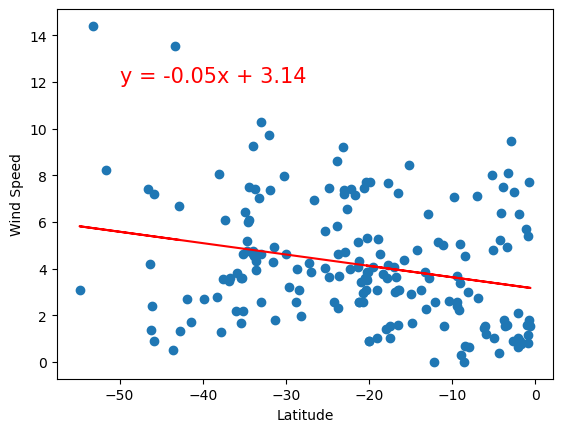

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE